## 

In [1]:
import os 
import shutil

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Open PsychoPy metadata csv

def openPsychoPyExperimentMetadata(path):
    df = pd.read_csv(path)
    df = df[['videos','participant','sessions.thisIndex']]
    df.columns.values[2] = 'session'
    return df

def buildOneHotEncoding(row):
    filepath = row['videos']
    filepath = filepath.split('/')[1:-1]
    filepath[0] = filepath[0].split('_')[1:]
    row['init'] = int(filepath[0][0][-1])
    row['perturbation'] = 1 if filepath[0][-1] == "perturbation" else 0
    row["delta"] = 0 if filepath[-1] == "original" else int(filepath[-1][-1])

    return row

def retrieveGazePosition(row):
    # folder = f"{row['participant']}_{row['session']}_"
    folder = f'00{row.name}' if row.name < 10 else f'0{row.name}'
    csv_path = 'pupil_data/' + folder + '/gaze_positions.csv'
    df = pd.read_csv(csv_path,sep=(','))

    x = df.norm_pos_x.to_list()
    y = df.norm_pos_y.to_list()

    row['norm_pos_x'] = x
    row['norm_pos_y'] = y
    return row



In [3]:
data = openPsychoPyExperimentMetadata('data/695811_PFE_2023-11-22_15h15.35.294.csv')
data = data.apply(buildOneHotEncoding, axis = 1)
data.head(10)


,videos,participant,session,init,perturbation,delta
0,video/Sphere_init1_speed1_perturbation/origina...,695811,0,1,1,0
1,video/Sphere_init4_speed1_perturbation/delta1/...,695811,0,4,1,1
2,video/Sphere_init4_speed1/original/0001-0150.avi,695811,0,4,0,0
3,video/Sphere_init2_speed1_perturbation/origina...,695811,0,2,1,0
4,video/Sphere_init2_speed1_perturbation/delta2/...,695811,0,2,1,2
5,video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2
6,video/Sphere_init3_speed1_perturbation/delta2/...,695811,0,3,1,2
7,video/Sphere_init3_speed1/delta2/0001-0150.avi,695811,0,3,0,2
8,video/Sphere_init4_speed1/delta1/0001-0150.avi,695811,0,4,0,1
9,video/Sphere_init1_speed1/delta2/0001-0150.avi,695811,0,1,0,2


In [14]:
#Script to copy pupil exported csv data to pupil_data folder

# Source and destination paths
rec_folder = '/Users/Quentin/recordings/2023_11_22/'
destination_root = 'pupil_data'
# Get a list of all folders in the source directory
folders_to_copy = [folder for folder in os.listdir(rec_folder) if os.path.isdir(os.path.join(rec_folder, folder))]
print(folders_to_copy)
# # Copy each folder to the destination directory with a new name to avoid conflicts
for folder in folders_to_copy:
    source_folder_path = os.path.join(rec_folder, folder)
    source_folder_path += '/exports/000'
    
    # Generate a new folder name (you can modify this logic if needed)

    
    destination_folder_path = os.path.join(destination_root, folder)
    
    # Copy the entire folder to the new destination
    shutil.copytree(source_folder_path, destination_folder_path)

print("Folders copied successfully.")


['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024']
Folders copied successfully.


In [26]:
data = data.apply(retrieveGazePosition, axis = 1)
data.head(10)

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y
0,video/Sphere_init1_speed1_perturbation/origina...,695811,0,1,1,0,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562..."
1,video/Sphere_init4_speed1_perturbation/delta1/...,695811,0,4,1,1,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595..."
2,video/Sphere_init4_speed1/original/0001-0150.avi,695811,0,4,0,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806..."
3,video/Sphere_init2_speed1_perturbation/origina...,695811,0,2,1,0,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588..."
4,video/Sphere_init2_speed1_perturbation/delta2/...,695811,0,2,1,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536..."
5,video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2,"[0.4202229254324622, 0.420982540597646, 0.4205...","[0.5714225462855844, 0.5690279633201274, 0.571..."
6,video/Sphere_init3_speed1_perturbation/delta2/...,695811,0,3,1,2,"[0.4949238820776631, 0.4942431179106997, 0.494...","[0.6029637919150848, 0.6011743254788668, 0.600..."
7,video/Sphere_init3_speed1/delta2/0001-0150.avi,695811,0,3,0,2,"[0.5604898325876684, 0.5605932060212291, 0.560...","[0.6678704527647227, 0.6655222863993384, 0.667..."
8,video/Sphere_init4_speed1/delta1/0001-0150.avi,695811,0,4,0,1,"[0.551338819777699, 0.5506806963211572, 0.5505...","[0.6751235309868131, 0.6759694609798702, 0.676..."
9,video/Sphere_init1_speed1/delta2/0001-0150.avi,695811,0,1,0,2,"[0.4850120349494281, 0.4849069573400225, 0.484...","[0.639279312233411, 0.6391147542209423, 0.6381..."


In [27]:
init1 = data[(data['init']==1)]

init2 = data[(data['init']==2)]

init3 = data[(data['init']==3)]

init4 = data[(data['init']==4)]

init = [init1 , init2 , init3 , init4]

In [28]:
init3.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y
6,video/Sphere_init3_speed1_perturbation/delta2/...,695811,0,3,1,2,"[0.4949238820776631, 0.4942431179106997, 0.494...","[0.6029637919150848, 0.6011743254788668, 0.600..."
7,video/Sphere_init3_speed1/delta2/0001-0150.avi,695811,0,3,0,2,"[0.5604898325876684, 0.5605932060212291, 0.560...","[0.6678704527647227, 0.6655222863993384, 0.667..."
10,video/Sphere_init3_speed1_perturbation/delta1/...,695811,0,3,1,1,"[0.3935416867218725, 0.3943393144597462, 0.394...","[0.8394674527811611, 0.840381688660701, 0.8401..."
15,video/Sphere_init3_speed1_perturbation/origina...,695811,0,3,1,0,"[0.4728706292701923, 0.4727106723147812, 0.472...","[0.6276530045910285, 0.6255591579506158, 0.626..."
16,video/Sphere_init3_speed1/delta1/0001-0150.avi,695811,0,3,0,1,"[0.5484242475736627, 0.549585598870643, 0.5499...","[0.6815051635677363, 0.681366750664831, 0.6801..."


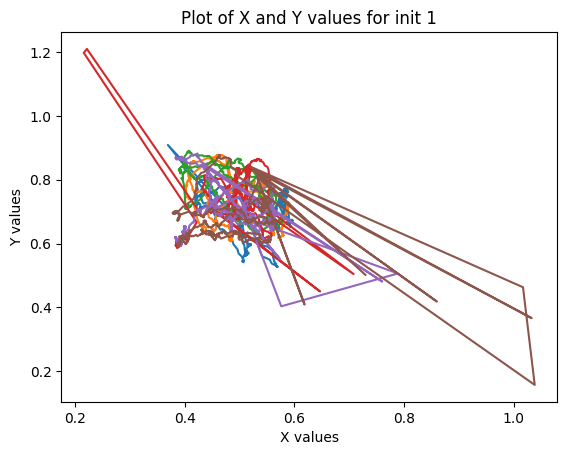

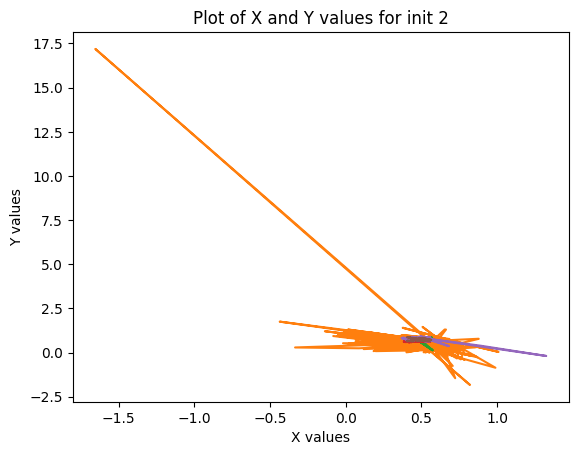

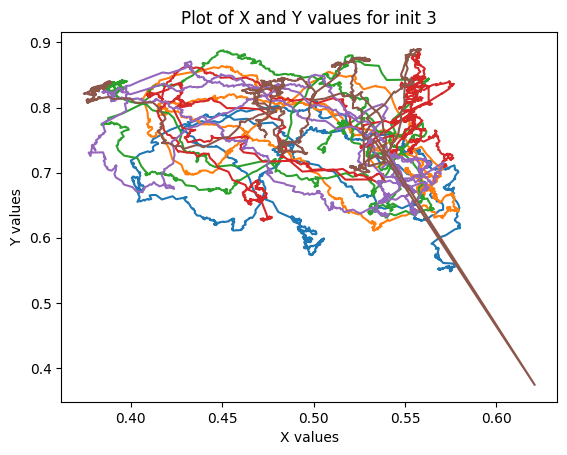

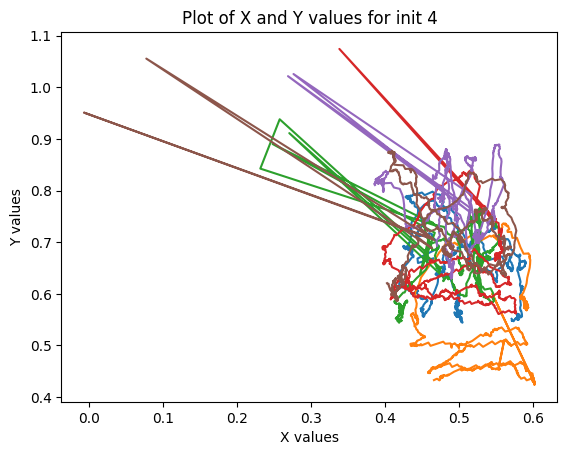

In [29]:
def createPlot(row):
    x = row.norm_pos_x
    y = row.norm_pos_y

    plt.plot(x,y)


for i , df in enumerate(init):
    df.apply(createPlot, axis = 1)        
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'Plot of X and Y values for init {i+1}')
    plt.show()